In [1]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon, shape, Point
import math
import re

In [2]:
#gdf = geopandas.read_file('/Users/tili/Desktop/CIIR/results/Tissue_annotation_qupath_geojson_output/200116_ST-AR_BC_A_B_V19T26-012_KT_V1-Spot000001.geojson')

In [7]:
#gdf.geometry[1]

In [2]:
# Load metadata
info = pd.read_csv('/Users/tili/Desktop/CIIR/data/ST-AR_Visium_samples.csv')

# Get sample ID
info['sampleID'] = info['Patientid'] + info['Tumor area']
info

Patient Patientid Tumor area      Visium ID  \
0   TD-2532-BCSA1     BCSA1      TumA1  V19T26-012_A1   
1   TD-2532-BCSA1     BCSA1      TumA2  V19T26-012_B1   
2   TD-2532-BCSA1     BCSA1      TumB1  V19T26-012_C1   
3   TD-2532-BCSA1     BCSA1      TumB2  V19T26-012_D1   
4   TD-2532-BCSA2     BCSA2      TumB1  V10F24-112_C1   
5   TD-2532-BCSA2     BCSA2      TumB2  V10F24-112_D1   
6   TD-2532-BCSA2     BCSA2      TumC1  V10F24-113_A1   
7   TD-2532-BCSA2     BCSA2      TumC2  V10F24-113_B1   
8   TD-2532-BCSA2     BCSA2      TumD1  V10F24-113_C1   
9   TD-2532-BCSA2     BCSA2      TumD2  V10F24-113_D1   
10  TD-2532-BCSA2     BCSA2      TumE1  V10F24-114_C1   
11  TD-2532-BCSA2     BCSA2      TumE2  V10F24-114_D1   
12  TD-2532-BCSA3     BCSA3      TumA1  V19T26-031_D1   
13  TD-2532-BCSA3     BCSA3      TumA2  V19T26-031_C1   
14  TD-2532-BCSA3     BCSA3      TumB1  V19T26-031_B1   
15  TD-2532-BCSA3     BCSA3      TumB2  V19T26-031_A1   
16  TD-2532-BCSA3     BCSA3      TumC1  V19T26-032_D1   
17  TD-2532-BCSA3     BCSA3      TumC2  V19T26-032_C1   
18  TD-2532-BCSA3     BCSA3      TumD1  V19T26-032_B1   
19  TD-2532-BCSA3     BCSA3      TumD2  V19T26-032_A1   
20  TD-2532-BCSA2     BCSA2      TumD3  V10F24-114_A1   
21  TD-2532-BCSA2     BCSA2      TumD4  V10F24-114_B1   
22  TD-2532-BCSA4     BCSA4      TumA1  V10B01-135_A1   

                                        Visum h5ad ID    name   type  width  \
0   200116_ST-AR_BC_A_B_V19T26-012_KT_V1-Spot00000...  a1.012   TNBC  29184   
1   200116_ST-AR_BC_A_B_V19T26-012_KT_V2-Spot00000...  b1.012   TNBC  29184   
2   200116_ST-AR_BC_A_B_V19T26-012_KT_V3-Spot00000...  c1.012   TNBC  29184   
3   200116_ST-AR_BC_A_B_V19T26-012_KT_V4-Spot00000...  d1.012   TNBC  29184   
4      200616_BC-SA2_V10F24-112_KT.C1-Spot000001.h5ad  c1.112  HER2+  47616   
5      200616_BC-SA2_V10F24-112_KT.D1-Spot000001.h5ad  d1.112  HER2+  47616   
6     200715_BC_SA2_C_D_V10F24-113.A1-Spot000001.h5ad  a1.113  HER2+  48640   
7     200715_BC_SA2_C_D_V10F24-113.B1-Spot000001.h5ad  b1.113  HER2+  48640   
8     200715_BC_SA2_C_D_V10F24-113.C1-Spot000001.h5ad  c1.113  HER2+  48640   
9     200715_BC_SA2_C_D_V10F24-113.D1-Spot000001.h5ad  d1.113  HER2+  48640   
10    200715_BC_SA2_D_E_V10F24-114.C1-Spot000001.h5ad  c1.114  HER2+  48640   
11    200715_BC_SA2_D_E_V10F24-114.D1-Spot000001.h5ad  d1.114  HER2+  48640   
12     200219_BC_SA3_V19T26-031_CE_V4-Spot000001.h5ad  d1.031  HER2+  52736   
13     200219_BC_SA3_V19T26-031_CE_V3-Spot000001.h5ad  c1.031  HER2+  52736   
14     200219_BC_SA3_V19T26-031_CE_V2-Spot000001.h5ad  b1.031  HER2+  52736   
15     200219_BC_SA3_V19T26-031_CE_V1-Spot000001.h5ad     NaN  HER2+  52736   
16  200221_BC_SA3_C-D_V19T26-032_CE_V4-Spot000001....  d1.032  HER2+  52736   
17  200221_BC_SA3_C-D_V19T26-032_CE_V3-Spot000001....  c1.032  HER2+  52736   
18  200221_BC_SA3_C-D_V19T26-032_CE_V2-Spot000001....  b1.032  HER2+  52736   
19  200221_BC_SA3_C-D_V19T26-032_CE_V1-Spot000001....  a1.032  HER2+  52736   
20    200715_BC_SA2_D_E_V10F24-114.A1-Spot000001.h5ad  a1.114  HER2+  48640   
21    200715_BC_SA2_D_E_V10F24-114.B1-Spot000001.h5ad  b1.114  HER2+  48640   
22  220302_sATAC_OMNI_V10B01-135_NB.A1-Spot000001....  a1.135  HER2+  48640   

    height    sampleID  
0    29696  BCSA1TumA1  
1    29696  BCSA1TumA2  
2    29696  BCSA1TumB1  
3    29696  BCSA1TumB2  
4    48128  BCSA2TumB1  
5    48128  BCSA2TumB2  
6    47104  BCSA2TumC1  
7    47104  BCSA2TumC2  
8    47104  BCSA2TumD1  
9    47104  BCSA2TumD2  
10   47104  BCSA2TumE1  
11   47104  BCSA2TumE2  
12   52736  BCSA3TumA1  
13   52736  BCSA3TumA2  
14   52736  BCSA3TumB1  
15   51712  BCSA3TumB2  
16   52736  BCSA3TumC1  
17   52736  BCSA3TumC2  
18   52736  BCSA3TumD1  
19   52736  BCSA3TumD2  
20   47104  BCSA2TumD3  
21   47104  BCSA2TumD4  
22   47104  BCSA4TumA1

In [3]:
def create_regular_polygon(center, radius, num_vertices):
    """
    Create a regular polygon with a specified number of vertices centered at a given point.
    :param center: A shapely.geometry.point. Point representing the center of the polygon.
    :param radius: The radius of the polygon (distance from the center to any vertex).
    :param num_vertices: The number of vertices (and sides) of the polygon.
    :return: A shapely.geometry.polygon.Polygon representing the regular polygon.
    """
    angle_between_vertices = 2 * math.pi / num_vertices
    vertices = [
        (
            center.x + radius * math.cos(i * angle_between_vertices),
            center.y + radius * math.sin(i * angle_between_vertices)
        )
        for i in range(num_vertices)
    ]
    return Polygon(vertices)

Tumor
Tumor
Tumor
Tumor
Tumor
Tumor
Tumor
Tumor
Tumor
Tumor
Tumor


/Users/tili/miniconda3/lib/python3.12/site-packages/geopandas/plotting.py:684: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


Tumor


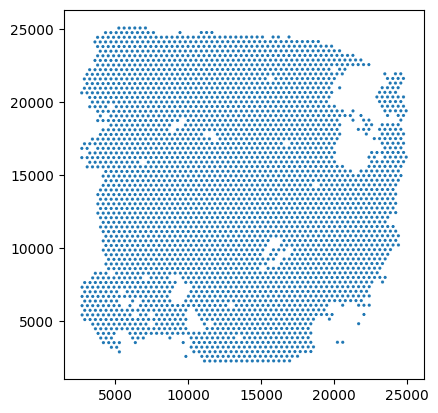

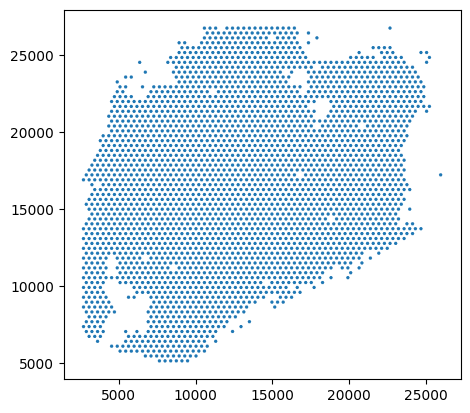

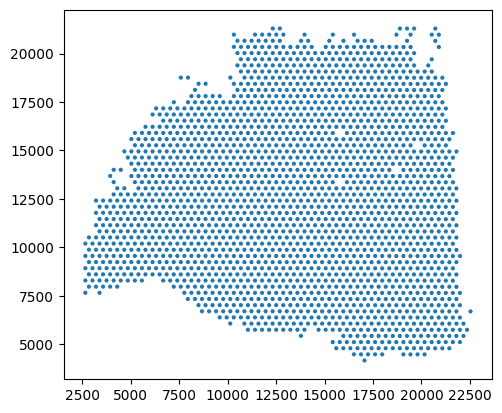

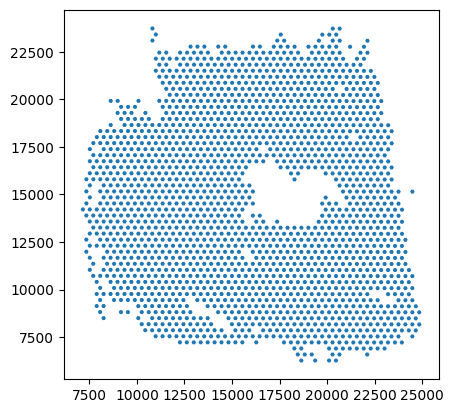

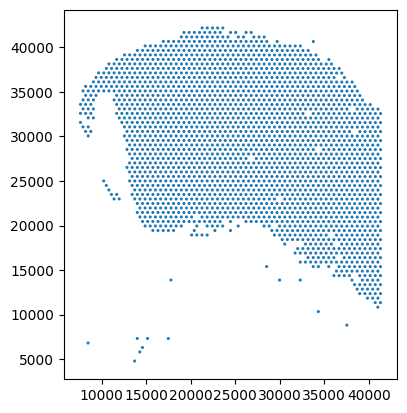

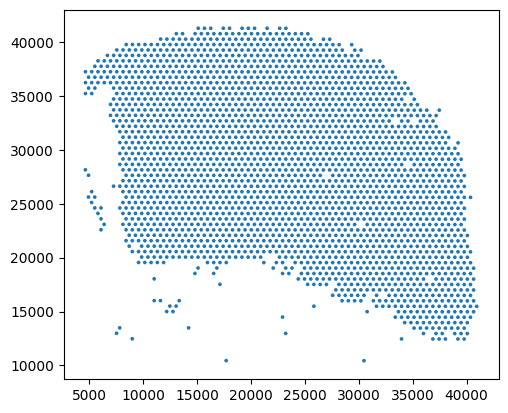

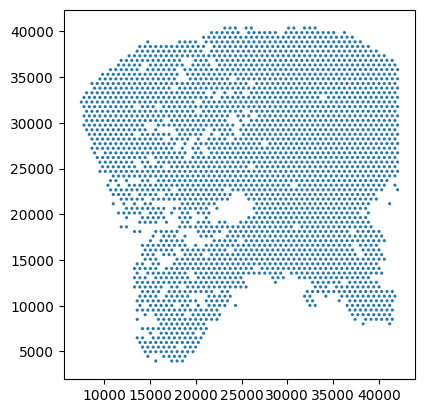

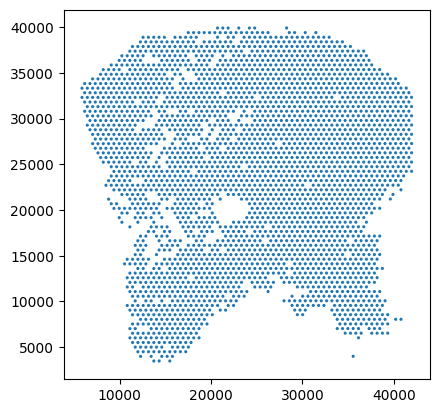

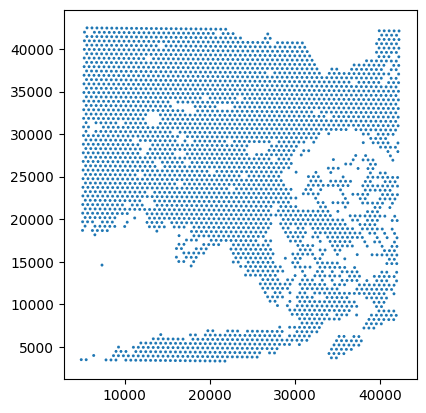

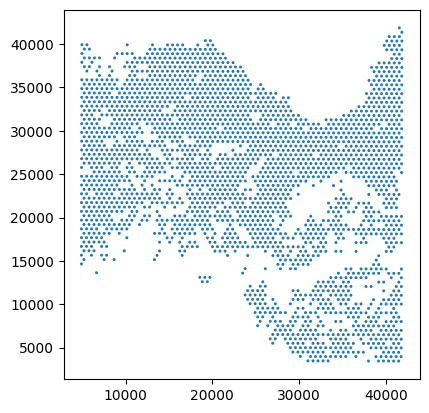

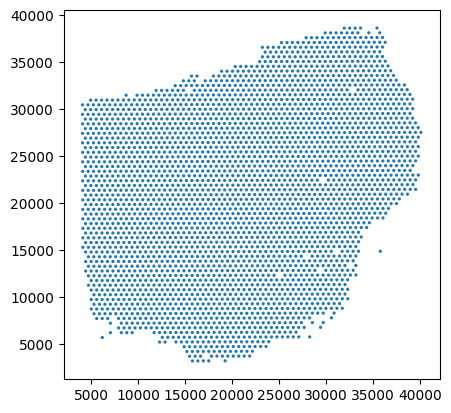

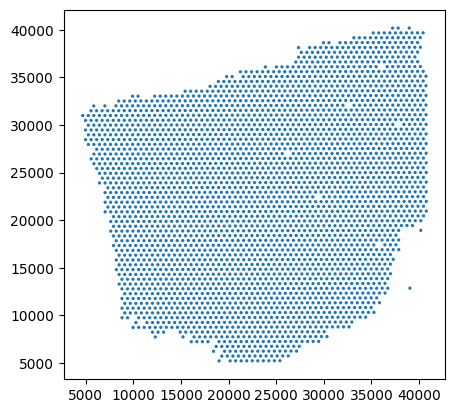

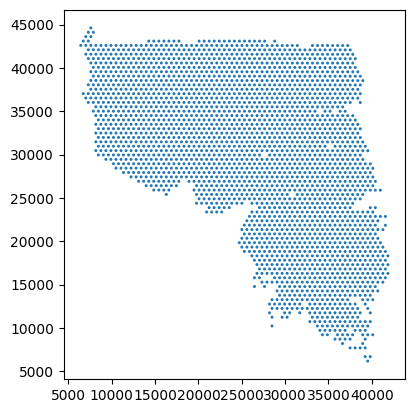

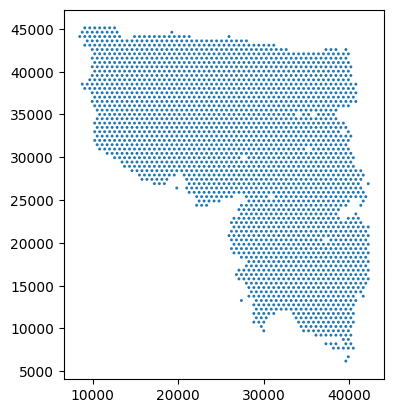

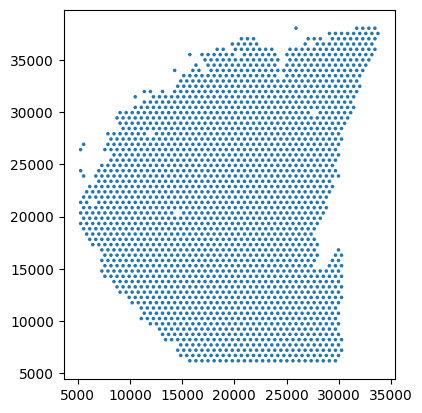

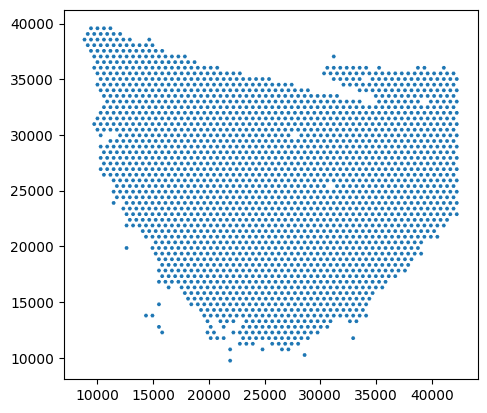

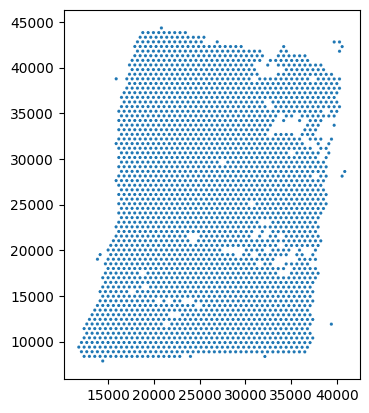

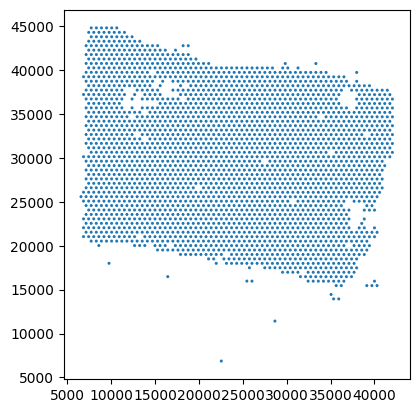

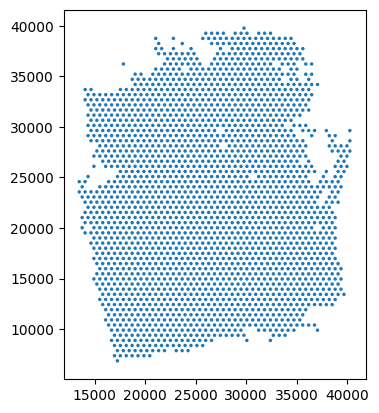

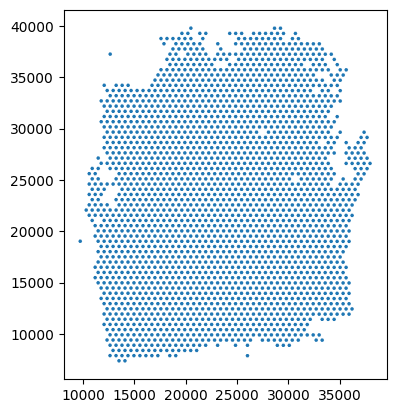

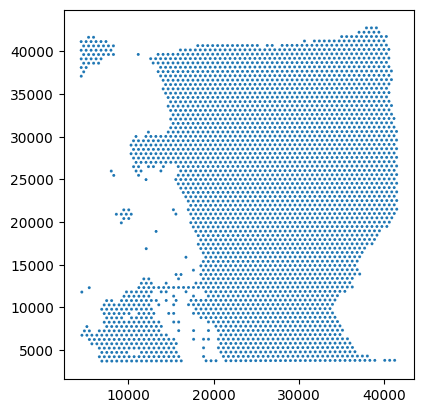

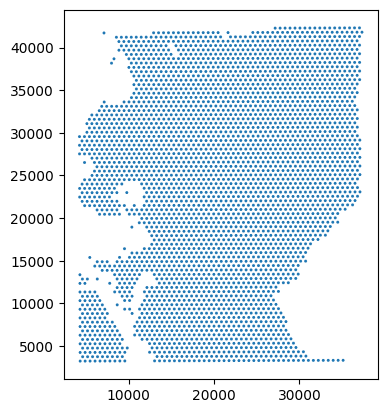

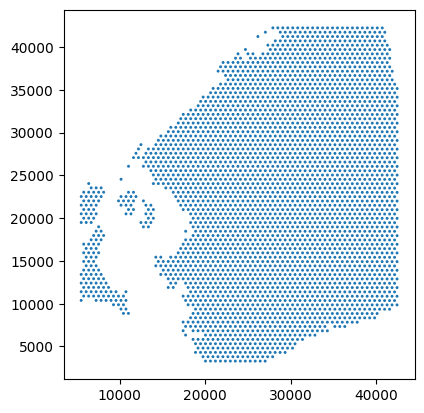

In [4]:
for row in info.iterrows():
    visiumid = row[1]['Visum h5ad ID']
    visium = re.sub('.h5ad', '', visiumid)
    # Load geojson file with tumor and stroma annotation
    path = '/Users/tili/Desktop/CIIR/results/Tissue_annotation_qupath_geojson_output/' + visium + '.geojson'
    gdf = geopandas.read_file(path)

    # Load corresponding visium spot geojson file
    id = row[1]['sampleID']
    path = '/Users/tili/Desktop/CIIR/data/Visium_circle_geojson/' + id + '_circle_data.geojson'
    sp = geopandas.read_file(path)
    sp2 = sp.copy()

    # Create polygon from the geojson point 
    sp = sp.assign(geometry = [create_regular_polygon(x.geometry,x.radius,6) for i,x in sp.iterrows()])

    # Get the tumor and stroma index
    cla = gdf['classification']
    if cla[0].get('name') == "Tumor":
        print(cla[0].get('name'))
        tumor = 0
        stroma = 1
    elif cla[0].get('name') == "Stroma":
        tumor = 1
        stroma = 0

    # Print visium spot and geojson file to see if they match
    gdf.geometry[tumor]
    point = list(sp.geometry)
    # Create a GeoDataFrame
    gdf_visium = geopandas.GeoDataFrame({'geometry': point})
    gdf_visium.plot()

    # Calculate tumor and stroma fraction
    spdf = pd.DataFrame([{'x':x.x, 'y':x.y} for x in sp2.geometry])
    tumor_fraction = sp.geometry.apply(lambda x:x.intersection(gdf.geometry[tumor]).area/x.area)
    stroma_fraction = sp.geometry.apply(lambda x:x.intersection(gdf.geometry[stroma]).area/x.area)

    # Save results to the sp data
    spdf = spdf.assign(tumor_frac = tumor_fraction)
    spdf = spdf.assign(stromal_frac = stroma_fraction)
    spdf = spdf.assign(cellid = sp.cellid)

    # Save the results as csv file
    path = '/Users/tili/Desktop/CIIR/results/Tissue_annotation_qupath_analyzed/' + id + '_tissue.csv'
    spdf.to_csv(path)